# **<span style="color:#00C853;">Schneider Electric Hackathon </span>**

> This notebook is part of a Hackathon held by nuwe.io on 05/21/2022.
> 
> To get the API key, create an account in the [website](https://nuwe.io/challenge/data-science-se) .

#### Background
----------------------------------------------------------------------------------------------------------

The EU contributes 18% of total global warming gas emissions; However, it is increasingly determined to take the lead in the fight against climate change. That is why it has set itself the goal of reaching zero carbon emissions by 2050.

To this end, it has put in place a wealth of resources to help achieve this goal over the next few years, and it will need your help to do so.

### Dataset
This dataset contains data on industrial facilities and emissions across Europe.
The dataset will consist of the following variables of interest:

__countryName__: Country in which the facility is located

__EPRETRSectorCode__: Code of the sector in which the company specialises

__eptrSectorName__: Name of the sector in which it specialises

__EPRTRAnnexIMainActivityCode__: Code of the specialisation within the sector in which they operate

__EPRTRAnnexIMainActivityLabel__: Specialisation within the sector in which they operate

__FacilityInspireID__: Building identifier

__facilityName__: Name of the building in which the activity takes place

__City__: City in which the facility is located

__CITY ID__: ID to confirm location

__targetRelease__: Type of polluter to study

__pollutant__: Type of pollutant emitted (Target variable). In order to follow the same standard, you must encode this variables as follows:

| pollutant |	number |
| ------ | ---------| 
|Nitrogen oxides (NOX) |	0 |
|Carbon dioxide (CO2)	|1    |
|Methane (CH4)	|  2      |

__DAY__: Day on which the report is made

__MONTH__: Reporting month

__reportingYear__: Reporting year

__CONTINENT__: Continent on which the company is located

__max_wind_speed__: Maximum wind speed

__avg_wind_speed__: Average wind speed

__min_wind_speed__: Minimum wind speed

__max_temp__: Maximum temperature

__avg_temp__: Average temperature

__min_temp__: Minimum temperature

__DAYS WITH FOG__: Total days of the month recorded in the area

__REPORTER NAME__: Reporter's name

The dataset is split into Training Dataset and Testing Dataset.

<img src=" https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricES22/final/images/fragmentation_green.png ">

To train the model, the training dataset has to be used. It is fragmented in different datasets and in different formats.

**Roadmap**

Before we dive headlong into programming, we should outline a brief guide to keep us on track. The following steps form the basis of any machine learning workflow once we have a problem and a model in mind:

* 1) Raising the question.
* 2) Acquiring the data. 
* 3) Adapting information, identifying and correcting anomalies (EDA).
* 4) Preparar los datos para el modelo de aprendizaje automático.
* 5) Training the model with training data.
* 6) Making predictions with test data.
* 7) Compare predictions with test data.
* 8) Adjust the model.
* 9) Results presentation.

---------------------------------------------------------------------

## ✅1) Raising the question  ❓

The exercise consists of obtaining a predictive model capable of classifying whether the variable __pollutant__ is going to be Nitrogen oxides (NOX), Carbon dioxide (CO2) or Methane (CH4), according to the oder variables for which it would be **objective** for the model to be as accurate as possible.

**NOTE**: For in this case, the client already informs us how the coding of the output variables should be.

---------------------------------------------------------------------

## ✅ 2) Acquiring the data  🔍

### **<span style="color:#43A047;">2.1 Importing required libraries. </span>**


In [1]:
# Data acquirement and processing
# ======================================================================================
import pandas as pd
import json
import numpy as np 
import nltk
import datetime as dt

# Graphics
# ======================================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider, fixed

# Preprocessing 
# ======================================================================================
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# NLP (Natural Language Programming) 
# ======================================================================================
import string
import re
import nltk 
import fitz
from nltk.util import pr
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Modeling for a categorical target
# ======================================================================================
from sklearn.linear_model import LogisticRegression   
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 

# Testing and validating
# ======================================================================================
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.inspection import permutation_importance
import multiprocessing

# Warnings Configuration
# ======================================================================================
import warnings
warnings.filterwarnings("ignore")

### **<span style="color:#43A047;">2.2 Reading data from CSV </span>**

#### **<span style="color:#4CAF50;">2.2.1 Reading first data CSV </span>**

In [2]:
data1_csv_df = pd.read_csv("../1-Classification/datasets/train1.csv", sep=',') #1-Loading the first csv

In [3]:
data1_csv_df.head() #2-We look at the heading and check that it was read correctly.

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,...,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Germany,Mineral industry,Installations for the production of cement cli...,https://registry.gdi-de.org/id/de.ni.mu/062217...,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,...,EUROPE,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f
1,Italy,Mineral industry,Installations for the production of cement cli...,IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,...,EUROPE,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963
2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,...,EUROPE,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada
3,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,...,EUROPE,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/Productio...,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...",Tampere,AIR,Methane (CH4),2018,12,...,EUROPE,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a


In [4]:
data1_csv_df.shape #3-Quickly we check the format

(18563, 21)

#### **<span style="color:#4CAF50;">2.2.2 Reading second data CSV </span>**

In [5]:
data2_csv_df = pd.read_csv("../1-Classification/datasets/train3.csv") #1-Loading the second csv

In [6]:
data2_csv_df.head() #2-We look at the heading and check that it was read correctly.

,Unnamed: 0,Unnamed: 1,CITY ID,CONTINENT,City,DAY,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,EPRTRSectorCode,...,countryName,eprtrSectorName,facilityName,max_temp,max_wind_speed,min_temp,min_wind_speed,pollutant,reportingYear,targetRelease
0,0,47068,4c325d62c064477ef17b4c6e4437e121,EUROPE,Europoort Rotterdam,2,1,4(a),Chemical installations for the production on a...,4,...,Netherlands,Chemical industry,Indorama Ventures Europe BV,13.256816,11.019329,14.696895,20.899762,Carbon dioxide (CO2),2020,AIR
1,1,32952,f5e609e7095f91cc8ce9ed6d8e774a0d,EUROPE,RION,3,2,3(c),Installations for the production of cement cli...,3,...,Greece,Mineral industry,TITAN CEMENT S.A. - DREPANO PLANT,4.528859,14.512395,9.219003,23.243403,Nitrogen oxides (NOX),2019,AIR
2,2,72375,cfab1ba8c67c7c838db98d666f02a132,EUROPE,--,1,12,1(c),Thermal power stations and other combustion in...,1,...,United Kingdom,Energy sector,Cormorant Alpha,10.669133,20.262171,14.715465,23.956529,Nitrogen oxides (NOX),2009,AIR
3,3,40702,95b4e51f7b662598134e1eb956407c74,EUROPE,DRIZZONA,17,1,7(a),Installations for the intensive rearing of pou...,7,...,Italy,Intensive livestock production and aquaculture,SOCIETA' AGRICOLA SPARAVALLE DI FERRARI GIUSEP...,7.095682,18.283547,13.582024,26.696266,Methane (CH4),2014,AIR
4,4,29884,f4433be3b1bfaeeb0633eb65d04b1325,EUROPE,Lünen,6,0,5(a),Installations for the recovery or disposal of ...,5,...,Germany,Waste and wastewater management,Biomassekraftwerk Lünen GmbH,9.886774,13.759408,14.006226,24.768933,Carbon dioxide (CO2),2015,AIR


In [7]:
data2_csv_df.shape #3-Quickly we check the format

(9500, 25)

So, the first 50% of the data is already loaded, let's proceed with the rest.

### **<span style="color:#43A047;">2.3 Reading data from API json </span>**

#### **<span style="color:#4CAF50;">2.3.1. Reading first json data </span>**

In [8]:
url = 'http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/first'
data1_js_df = pd.read_json(url)

In [9]:
data1_js_df.head() #2-We look at the heading and check that it was read correctly.

,,CITY ID,CONTINENT,City,DAY,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,EPRTRSectorCode,FacilityInspireID,...,countryName,eprtrSectorName,facilityName,max_temp,max_wind_speed,min_temp,min_wind_speed,pollutant,reportingYear,targetRelease
0,47068,4c325d62c064477ef17b4c6e4437e121,EUROPE,Europoort Rotterdam,2,1,4(a),Chemical installations for the production on a...,4,NL.RIVM/000019070.FACILITY,...,Netherlands,Chemical industry,Indorama Ventures Europe BV,13.256816,11.019329,14.696895,20.899762,Carbon dioxide (CO2),2020,AIR
1,32952,f5e609e7095f91cc8ce9ed6d8e774a0d,EUROPE,RION,3,2,3(c),Installations for the production of cement cli...,3,EL.CAED/100075.FACILITY,...,Greece,Mineral industry,TITAN CEMENT S.A. - DREPANO PLANT,4.528859,14.512395,9.219003,23.243403,Nitrogen oxides (NOX),2019,AIR
2,72375,cfab1ba8c67c7c838db98d666f02a132,EUROPE,--,1,12,1(c),Thermal power stations and other combustion in...,1,UK.CAED/BEISOffsh-Cormorant-Alpha.FACILITY,...,United Kingdom,Energy sector,Cormorant Alpha,10.669133,20.262171,14.715465,23.956529,Nitrogen oxides (NOX),2009,AIR
3,40702,95b4e51f7b662598134e1eb956407c74,EUROPE,DRIZZONA,17,1,7(a),Installations for the intensive rearing of pou...,7,IT.CAED/260342003.FACILITY,...,Italy,Intensive livestock production and aquaculture,SOCIETA' AGRICOLA SPARAVALLE DI FERRARI GIUSEP...,7.095682,18.283547,13.582024,26.696266,Methane (CH4),2014,AIR
4,29884,f4433be3b1bfaeeb0633eb65d04b1325,EUROPE,Lünen,6,0,5(a),Installations for the recovery or disposal of ...,5,https://registry.gdi-de.org/id/de.nw.inspire.p...,...,Germany,Waste and wastewater management,Biomassekraftwerk Lünen GmbH,9.886774,13.759408,14.006226,24.768933,Carbon dioxide (CO2),2015,AIR


In [10]:
data1_js_df.shape #3-Quickly we check the format

(9500, 24)

In [11]:
data1_js_df.to_csv("../1-Classification/datasets/train3.csv") #Saving the data set in our directory

#### **<span style="color:#4CAF50;">2.3.2. Reading second json data </span>**

In [12]:
url = 'http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/second'
data2_js_df = pd.read_json(url)

In [13]:
data2_js_df.head() #2-We look at the heading and check that it was read correctly.

,,CITY ID,CONTINENT,City,DAY,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,EPRTRSectorCode,FacilityInspireID,...,countryName,eprtrSectorName,facilityName,max_temp,max_wind_speed,min_temp,min_wind_speed,pollutant,reportingYear,targetRelease
0,66841,e8d4668a35daa00b7802cdaac2b33bab,EUROPE,SIGTUNA,18,0,1(c),Thermal power stations and other combustion in...,1,SE.CAED/10014262.Facility,...,Sweden,Energy sector,BRISTAVERKET,12.910354,19.591152,17.822159,24.496401,Carbon dioxide (CO2),2010,AIR
1,43952,3a9c3ae8ea2e275700947e511afca943,EUROPE,Kaunas,3,1,1(c),Thermal power stations and other combustion in...,1,LT.EEA/3.FACILITY,...,Lithuania,Energy sector,Kauno elektrine,1.566654,9.006533,4.398770,20.074976,Carbon dioxide (CO2),2015,AIR
2,77831,3d7694a841fc5d426287f208f5e04f61,EUROPE,WORKINGTON,20,10,6(b),Industrial plants for the production of paper ...,6,UK.CAED/EW_EA-1427.FACILITY,...,United Kingdom,Paper and wood production and processing,Workington Board Mill,10.241999,14.076643,13.447854,25.239151,Nitrogen oxides (NOX),2015,AIR
3,67548,f8a4753cdbccbd64f0411a207e071aac,EUROPE,SALA,5,2,5(d),Landfills (excluding landfills of inert waste ...,5,SE.CAED/10021261.Facility,...,Sweden,Waste and wastewater management,Isätra avfallsanläggning,12.684851,18.924086,17.377168,25.603714,Methane (CH4),2013,AIR
4,67772,ce2ddff460389bd5d9f1152dc5679d20,EUROPE,Lugnvik,26,1,1(c),Thermal power stations and other combustion in...,1,SE.CAED/10023054.Facility,...,Sweden,Energy sector,Lugnviksverket,7.826782,18.596857,11.731918,25.811989,Carbon dioxide (CO2),2014,AIR


In [14]:
data2_js_df.shape #3-Quickly we check the format

(9500, 24)

In [15]:
data2_js_df.to_csv("../1-Classification/datasets/train4.csv") #Saving the data set in our directory

#### **<span style="color:#4CAF50;">2.3.2. Reading thrid json data </span>**

In [16]:
url = 'http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/third'
data3_js_df = pd.read_json(url)

In [17]:
data3_js_df.head() #2-We look at the heading and check that it was read correctly.

,,CITY ID,CONTINENT,City,DAY,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,EPRTRSectorCode,FacilityInspireID,...,countryName,eprtrSectorName,facilityName,max_temp,max_wind_speed,min_temp,min_wind_speed,pollutant,reportingYear,targetRelease
0,41175,7951666b94e0f0891e0c66b2381fca55,EUROPE,TORINO,24,1,1(c),Thermal power stations and other combustion in...,1,IT.CAED/101511001.FACILITY,...,Italy,Energy sector,Iren Energia S.p.A.,7.367005,15.892429,12.571580,20.467596,Nitrogen oxides (NOX),2015,AIR
1,49299,33c89df2492e8d3efda719c849b530ea,EUROPE,Łódź,4,0,1(c),Thermal power stations and other combustion in...,1,PL.EEA/1321.FACILITY,...,Poland,Energy sector,Dalkia Łódź S.A. Elektrociepłownia nr 3,12.764269,14.168742,19.081248,25.439515,Carbon dioxide (CO2),2011,AIR
2,34879,4a8b9d98f65af3a29bbf298d8536c142,EUROPE,Tipperary,18,0,7(a)(ii),Installations for the intensive rearing of pig...,7,IE.CAED/P0489.FACILITY,...,Ireland,Intensive livestock production and aquaculture,Glen of Aherlow Pig Producers Co-Op Society Li...,9.278435,17.849098,15.912360,25.603904,Methane (CH4),2011,AIR
3,16905,e38f45f4d669e9f69fa97bfe049ceed6,EUROPE,REIMS,27,0,3(e),"Installations for the manufacture of glass, in...",3,FR.CAED/3453.FACILITY,...,France,Mineral industry,OI MANUFACTURING FRANCE REIMS,12.132210,10.348395,16.897353,18.131688,Nitrogen oxides (NOX),2014,AIR
4,75675,fb960490e42477cbfdcd6bab1793f31e,EUROPE,Hexham,28,2,6(b),Industrial plants for the production of paper ...,6,UK.LAED/E375_434.FACILITY,...,United Kingdom,Paper and wood production and processing,EGGER (UK) LIMITED,3.376109,13.803120,6.435358,22.215066,Nitrogen oxides (NOX),2012,AIR


In [18]:
data3_js_df.shape #3-Quickly we check the format

(9501, 24)

In [19]:
data3_js_df.to_csv("../1-Classification/datasets/train5.csv") #Saving the data set in our directory

So, the __99%__ of the data is already loaded.

### **<span style="color:#43A047;">2.4 Reading data from PDF </span>**

#### **<span style="color:#4CAF50;">2.4.1. Reading first PDF data. </span>**

I have used the PyMuPDF library for this purpose. This library provided many applications such as extracting images from PDF, extracting texts from different shapes, making annotations, draw a bounded box around the texts along with the features of libraries like PyPDF2.

In [22]:
folder = r"../1-Classification/datasets/train6/"
def get_files(folder):
    import os
    os.chdir(folder)
    files = os.listdir()
    files = [x for x in files if x.endswith(".pdf")]
    return files 

In [23]:
#RUN FILE 
files = get_files(folder)    

In [24]:
patch = r"../train6/"
out = open("pdf_to_text.txt", "wb")  # open text output
for file in files:
    doc = fitz.open(patch + file)
    for page in doc:  # iterate the document pages
        text = page.get_text().encode("utf8")  # get plain text (is in UTF-8)
        out.write(text)  # write text of page
        out.write(bytes((12,)))  # write page delimiter (form feed 0x0C)
out.close()

In [25]:
all_annots = (open("pdf_to_text.txt", encoding="UTF-8")).readlines()

Splitting to form column name and its values :

In [26]:
cont=[]
for i in range(0,len(all_annots)):
    cont.append(all_annots[i].split(' :\n',0))

In [27]:
liss=[]
for i in range(0,len(cont)):
    lis=[]
    for j in cont[i]:
        j=j.replace('*','')
        j=j.replace('#','')
        j=j.replace(':','')
        j=j.replace('\n','') 
        j=j.replace(',','.')
        j=j.replace('E+','') # THIS MUST BE CHANGED
        j=j.strip()
        #print(j)
        lis.append(j)
    liss.append(lis)

In [28]:
features = ['FACILITY NAME', 'FacilityInspireID', 'COUNTRY', 'CONTINENT', 'CITY', 'EPRTRSectorCode', 'eprtrSectorName','emissions','DAY','MONTH','YEAR','max_wind_speed','min_wind_speed','avg_wind_speed','max_temp','min_temp','avg_temp','DAYS FOG','CITY_ID', 'pollutant']

In [29]:
data_pdf_df = pd.DataFrame(columns=features)

In [30]:
for i in features:
    cont = 0
    for j in range(0,len(liss)):                    
        if i == liss[j][0]:
            cont = cont + 1
            if len(liss[j+1][0].split(' ')) > 1 and (i != 'FACILITY NAME') and (i != 'eprtrSectorName') \
            and (i != 'COUNTRY') and (i != 'pollutant') and (i != 'CITY'):
                parcial=[]
                for k in range(len(liss[j+1][0].split(' '))):
                        parcial = liss[j+1][0].split(' ')
                        index = features.index(i)
                        data_pdf_df.loc[cont,features[index]] = parcial[0]
                        index = index +1
            else:
                data_pdf_df.loc[cont,i] = liss[j+1][0]     

In [31]:
cont = 1
flag = 0
for j in range(0,len(liss)):
        features_split = liss[j][0].split(' ')        
        if  len(features_split)> 1 :
            for l in features_split: 
                if l == 'YEAR':
                    if flag == 1:
                        cont = cont + 1
                    data_pdf_df.loc[cont,features[10]] = liss[j+1][0]     
                    flag = 1 
                elif l == 'max_wind_speed':
                    data_pdf_df.loc[cont,features[11]] = features_split[1] 
                elif l == 'avg_wind_speed':
                    if len(features_split)> 2 :
                        data_pdf_df.loc[cont,features[12]] = (features_split[0])   
                        data_pdf_df.loc[cont,features[13]] = (features_split[2]) 
                    else:
                        data_pdf_df.loc[cont,features[12]] = features_split[0]  
                        data_pdf_df.loc[cont,features[13]] = liss[j+1][0] 
                elif l == 'avg_temp':
                    data_pdf_df.loc[cont,features[15]] = features_split[0]
                    data_pdf_df.loc[cont,features[16]] = liss[j+1][0]           

In [33]:
data_pdf_df.head()

,FACILITY NAME,FacilityInspireID,COUNTRY,CONTINENT,CITY,EPRTRSectorCode,eprtrSectorName,emissions,DAY,MONTH,YEAR,max_wind_speed,min_wind_speed,avg_wind_speed,max_temp,min_temp,avg_temp,DAYS FOG,CITY_ID,pollutant
1,Millerhill Recycling & Energy Recovery Centre,UK.SEPA/200002651.Facility,United Kingdom,EUROPE,Millerhill. Dalkeith,5,Waste and wastewater management,175000,12,6,2019,1.7915,2.216,2.0415,1.5116,1.8215,1.7116,10,c662b4b4d859a9c224b5ac0acf221748,Nitrogen oxides (NOX)
2,Fife Ethylene Plant,UK.SEPA/200000061.Facility,United Kingdom,EUROPE,Cowdenbeath,1,Energy sector,6.808,12,4,2019,1.5216,2.0615,1.4616,9.6115,1.3316,8.6915,19,3c563ab0d76fc84128574b5da82f769a,Carbon dioxide (CO2)
3,Fife Ethylene Plant,UK.SEPA/200000061.Facility,United Kingdom,EUROPE,Cowdenbeath,1,Energy sector,6.808,12,4,2019,1.5216,2.0615,1.4616,9.6115,1.3316,8.6915,19,3c563ab0d76fc84128574b5da82f769a,Carbon dioxide (CO2)
4,Fife Ethylene Plant,UK.SEPA/200000061.Facility,United Kingdom,EUROPE,Cowdenbeath,1,Energy sector,633000,3,1,2019,1.1616,2.1816,1.6516,8.0315,1.0416,8.9415,10,3c563ab0d76fc84128574b5da82f769a,Nitrogen oxides (NOX)
5,Alloa Glass Factory,UK.SEPA/200000073.Facility,United Kingdom,EUROPE,Alloa,3,Mineral industry,1.4908,9,11,2019,1.1116,2.0316,1.616,-1.916,4.0716,1.3315,4,2cc8f54182c37b8907f534011ea01e6f,Carbon dioxide (CO2)


In [34]:
data_pdf_df.shape

(82, 20)

---------------------------------------------------------------------

## ✅  3) Adapting information, identifying and correcting anomalies 🔧
First, we have to merge all the datasets into one, so that we have a single package to analyze.

### **<span style="color:#43A047;">3.0 Checking column orders and differences in data sizes. </span>**

In [36]:
sizes = [["1st csv", data1_csv_df.shape],
         ["2nd csv", data2_csv_df.shape],
         ["1st json", data1_js_df.shape],
         ["2nd json", data2_js_df.shape],
         ["3th json", data3_js_df.shape],
         ["All pdf", data_pdf_df.shape]]
print("The sizes are: ")
sizes

The sizes are: 


[['1st csv', (18563, 21)],
 ['2nd csv', (9500, 25)],
 ['1st json', (9500, 24)],
 ['2nd json', (9500, 24)],
 ['3th json', (9501, 24)],
 ['All pdf', (82, 20)]]

If there is a difference in columns sizes, the differents columns should be displayed and determine what to do if it is vital information. You can either add a mean to the missing data or delete the extra columns.

In [37]:
columns =[["1st csv", data1_csv_df.columns.values],
         ["2nd csv", data2_csv_df.columns.values],
         ["1st json", data1_js_df.columns.values],
         ["2nd json", data2_js_df.columns.values],
         ["3th json", data3_js_df.columns.values],
         ["All pdf", data_pdf_df.columns.values]]
print("The column's order is:")
columns

The column's order is:


[['1st csv',
  array(['countryName', 'eprtrSectorName', 'EPRTRAnnexIMainActivityLabel',
         'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
         'pollutant', 'reportingYear', 'MONTH', 'DAY', 'CONTINENT',
         'max_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_temp',
         'avg_temp', 'min_temp', 'DAY WITH FOGS', 'REPORTER NAME',
         'CITY ID'], dtype=object)],
 ['2nd csv',
  array(['Unnamed: 0', 'Unnamed: 1', 'CITY ID', 'CONTINENT', 'City', 'DAY',
         'DAY WITH FOGS', 'EPRTRAnnexIMainActivityCode',
         'EPRTRAnnexIMainActivityLabel', 'EPRTRSectorCode',
         'FacilityInspireID', 'MONTH', 'REPORTER NAME', 'avg_temp',
         'avg_wind_speed', 'countryName', 'eprtrSectorName', 'facilityName',
         'max_temp', 'max_wind_speed', 'min_temp', 'min_wind_speed',
         'pollutant', 'reportingYear', 'targetRelease'], dtype=object)],
 ['1st json',
  array(['', 'CITY ID', 'CONTINENT', 'City', 'DAY', 'DAY WITH FOGS',
         'EPRTRAnn

### **<span style="color:#43A047;">3.1 Getting Columns column orders and differences in data sizes. </span>**

We make a backup of the data sets.

In [38]:
data_pdf_df.columns.values.tolist()

['FACILITY NAME',
 'FacilityInspireID',
 'COUNTRY',
 'CONTINENT',
 'CITY',
 'EPRTRSectorCode',
 'eprtrSectorName',
 'emissions',
 'DAY',
 'MONTH',
 'YEAR',
 'max_wind_speed',
 'min_wind_speed',
 'avg_wind_speed',
 'max_temp',
 'min_temp',
 'avg_temp',
 'DAYS FOG',
 'CITY_ID',
 'pollutant']

In [39]:
df1 = data1_csv_df.copy()
df2 = data2_csv_df.copy()
df3 = data1_js_df.copy()
df4 = data2_js_df.copy()
df5 = data3_js_df.copy()
df6 = data_pdf_df.copy()

In [40]:
def search_diferences(list1, list2, list3, list4, list5, list6):
    cont1=0
    cont2=0
    for i in list1, list2, list3, list4, list5, list6:
        cont1 = cont1 + 1
        for j in list1, list2, list3, list4, list5, list6:
            cont2 =  cont2 + 1          
            temp = [x for x in i if x not in j]
            if temp != []:
                print("The diferences between List %s and List %s is \n %s" %(cont1,cont2,temp))
        cont2 = 0

In [43]:
col1 = df1.columns.values.tolist()
col2 = df2.columns.values.tolist()
col3 = df3.columns.values.tolist()
col4 = df4.columns.values.tolist()
col5 = df5.columns.values.tolist()
col6 = df6.columns.values.tolist()

In [44]:
search_diferences(col1, col2, col3, col4, col5, col6)

The diferences between List 1 and List 6 is 
 ['countryName', 'EPRTRAnnexIMainActivityLabel', 'facilityName', 'City', 'targetRelease', 'reportingYear', 'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID']
The diferences between List 2 and List 1 is 
 ['Unnamed: 0', 'Unnamed: 1', 'EPRTRAnnexIMainActivityCode', 'EPRTRSectorCode']
The diferences between List 2 and List 3 is 
 ['Unnamed: 0', 'Unnamed: 1']
The diferences between List 2 and List 4 is 
 ['Unnamed: 0', 'Unnamed: 1']
The diferences between List 2 and List 5 is 
 ['Unnamed: 0', 'Unnamed: 1']
The diferences between List 2 and List 6 is 
 ['Unnamed: 0', 'Unnamed: 1', 'CITY ID', 'City', 'DAY WITH FOGS', 'EPRTRAnnexIMainActivityCode', 'EPRTRAnnexIMainActivityLabel', 'REPORTER NAME', 'countryName', 'facilityName', 'reportingYear', 'targetRelease']
The diferences between List 3 and List 1 is 
 ['', 'EPRTRAnnexIMainActivityCode', 'EPRTRSectorCode']
The diferences between List 3 and List 2 is 
 ['']
The diferences between List 3 and List 6 is 


### **<span style="color:#43A047;">3.2 Deleting useless columns </span>**

We will eliminate those columns that are not in the information provided and do not make sense and do not provide useful information other than noise.

* data1_csv_df = -
* data2_csv_df = __'Unnamed: 0'__ , __'Unnamed: 1'__
* data1_js_df = __" "__
* data2_js_df = __" "__
* data3_js_df = __" "__
* data_pdf_df = -

__NOTE__: This is not (EDA) Exploratory Data Analysis, just common sense. Another thing to take into account is that the pdf's have a different column from the others, that is to say, we have more information in the pdf's. __(emissions)__

In [45]:
df2.drop(['Unnamed: 0','Unnamed: 1'], inplace=True, axis=1)
df3.drop([''], inplace=True, axis=1)
df4.drop([''], inplace=True, axis=1)
df5.drop([''], inplace=True, axis=1)

### **<span style="color:#43A047;">3.3 Renaming Columns to Standarize the Data </span>**

In [46]:
df1=df1.rename(columns={'reportingYear': 'year', 'MONTH': 'month', 'DAY':'day', 'CONTINENT':'continent', 'countryName': 'country',\
                   'City':'city', 'CITY ID' : 'city_id', 'eprtrSectorName':'sector','EPRTRAnnexIMainActivityLabel' : 'activity',\
                   'EPRTRAnnexIMainActivityCode': 'facility_code', 'FacilityInspireID': 'facility_id', 'EPRTRSectorCode':'sector_code', 'facilityName': 'facility_name', 'targetRelease':'target_release',\
                   'DAY WITH FOGS': 'day_fogs','emissions':'emissions','max_wind_speed': 'max_wind_speed', 'avg_wind_speed':'avg_wind_speed',\
                   'min_wind_speed': 'min_wind_speed', 'max_temp':'max_temp', 'avg_temp':'avg_temp', 'min_temp':'min_temp',\
                   'REPORTER NAME':'reporter_name','pollutant':'pollutant'}, inplace=False)

df2=df2.rename(columns={'reportingYear': 'year', 'MONTH': 'month', 'DAY':'day', 'CONTINENT':'continent', 'countryName': 'country',\
                   'City':'city', 'CITY ID' : 'city_id', 'eprtrSectorName':'sector','EPRTRAnnexIMainActivityLabel' : 'activity',\
                   'EPRTRAnnexIMainActivityCode': 'facility_code', 'FacilityInspireID': 'facility_id', 'EPRTRSectorCode':'sector_code', 'facilityName': 'facility_name', 'targetRelease':'target_release',\
                   'DAY WITH FOGS': 'day_fogs','emissions':'emissions','max_wind_speed': 'max_wind_speed', 'avg_wind_speed':'avg_wind_speed',\
                   'min_wind_speed': 'min_wind_speed', 'max_temp':'max_temp', 'avg_temp':'avg_temp', 'min_temp':'min_temp',\
                   'REPORTER NAME':'reporter_name','pollutant':'pollutant'}, inplace=False)

df3=df3.rename(columns={'reportingYear': 'year', 'MONTH': 'month', 'DAY':'day', 'CONTINENT':'continent', 'countryName': 'country',\
                   'City':'city', 'CITY ID' : 'city_id', 'eprtrSectorName':'sector','EPRTRAnnexIMainActivityLabel' : 'activity',\
                   'EPRTRAnnexIMainActivityCode': 'facility_code', 'FacilityInspireID': 'facility_id', 'EPRTRSectorCode':'sector_code', 'facilityName': 'facility_name', 'targetRelease':'target_release',\
                   'DAY WITH FOGS': 'day_fogs','emissions':'emissions','max_wind_speed': 'max_wind_speed', 'avg_wind_speed':'avg_wind_speed',\
                   'min_wind_speed': 'min_wind_speed', 'max_temp':'max_temp', 'avg_temp':'avg_temp', 'min_temp':'min_temp',\
                   'REPORTER NAME':'reporter_name','pollutant':'pollutant'}, inplace=False)

df4=df4.rename(columns={'reportingYear': 'year', 'MONTH': 'month', 'DAY':'day', 'CONTINENT':'continent', 'countryName': 'country',\
                   'City':'city', 'CITY ID' : 'city_id', 'eprtrSectorName':'sector','EPRTRAnnexIMainActivityLabel' : 'activity',\
                   'EPRTRAnnexIMainActivityCode': 'facility_code', 'FacilityInspireID': 'facility_id', 'EPRTRSectorCode':'sector_code', 'facilityName': 'facility_name', 'targetRelease':'target_release',\
                   'DAY WITH FOGS': 'day_fogs','emissions':'emissions','max_wind_speed': 'max_wind_speed', 'avg_wind_speed':'avg_wind_speed',\
                   'min_wind_speed': 'min_wind_speed', 'max_temp':'max_temp', 'avg_temp':'avg_temp', 'min_temp':'min_temp',\
                   'REPORTER NAME':'reporter_name','pollutant':'pollutant'}, inplace=False)

df5=df5.rename(columns={'reportingYear': 'year', 'MONTH': 'month', 'DAY':'day', 'CONTINENT':'continent', 'countryName': 'country',\
                   'City':'city', 'CITY ID' : 'city_id', 'eprtrSectorName':'sector','EPRTRAnnexIMainActivityLabel' : 'activity',\
                   'EPRTRAnnexIMainActivityCode': 'facility_code', 'FacilityInspireID': 'facility_id', 'EPRTRSectorCode':'sector_code', 'facilityName': 'facility_name', 'targetRelease':'target_release',\
                   'DAY WITH FOGS': 'day_fogs','emissions':'emissions','max_wind_speed': 'max_wind_speed', 'avg_wind_speed':'avg_wind_speed',\
                   'min_wind_speed': 'min_wind_speed', 'max_temp':'max_temp', 'avg_temp':'avg_temp', 'min_temp':'min_temp',\
                   'REPORTER NAME':'reporter_name','pollutant':'pollutant'}, inplace=False)

df6=df6.rename(columns={'YEAR': 'year', 'MONTH': 'month', 'DAY':'day', 'CONTINENT':'continent', 'COUNTRY': 'country',\
                   'CITY':'city', 'CITY_ID' : 'city_id', 'eprtrSectorName':'sector','EPRTRAnnexIMainActivityLabel' : 'activity',\
                   'EPRTRAnnexIMainActivityCode': 'facility_code', 'FacilityInspireID': 'facility_id', 'EPRTRSectorCode':'sector_code', 'facilityName': 'facility_name', 'targetRelease':'target_release',\
                   'DAYS FOG': 'day_fogs','emissions':'emissions','max_wind_speed': 'max_wind_speed', 'avg_wind_speed':'avg_wind_speed',\
                   'min_wind_speed': 'min_wind_speed', 'max_temp':'max_temp', 'avg_temp':'avg_temp', 'min_temp':'min_temp',\
                   'REPORTER NAME':'reporter_name','pollutant':'pollutant'}, inplace=False)


### **<span style="color:#43A047;">3.4 Reordering the columns </span>**
First we select the dataset that contains the most **features**. If these columns do not exist in certain data sets they will be created, then we will evaluate the importance of such data and whether they will be eliminated or filled with information. At the end we reorder the columns to give a more logical sense to the datasets. We will place the __target__ variable at the end.

In [47]:
ordened_features = ['year','month','day', 'continent', 'country',\
                   'city','city_id', 'sector', 'activity',\
                    'facility_code', 'facility_id', 'sector_code','facility_name','target_release',\
                    'emissions', 'day_fogs','max_wind_speed','avg_wind_speed',\
                    'min_wind_speed', 'max_temp', 'avg_temp', 'min_temp',\
                    'reporter_name', 'pollutant']

#### **<span style="color:#43A047;">3.4.1 First data frame </span>**

In [48]:
temp = [x for x in ordened_features if x not in list(df1.columns.values)]

In [49]:
temp

['facility_code', 'sector_code', 'emissions']

In [50]:
df1[temp] = "0" #Adding empty columns and filling them with 0

#### **<span style="color:#43A047;">3.4.2 Second data frame </span>**

In [51]:
temp = [x for x in ordened_features if x not in list(df2.columns.values)]

In [52]:
temp

['emissions']

In [53]:
df2[temp] = "0" #Adding empty columns and filling them with 0

#### **<span style="color:#43A047;">3.4.3 Third data frame </span>**

In [54]:
temp = [x for x in ordened_features if x not in list(df3.columns.values)]

In [495]:
temp

['emissions']

In [55]:
df3[temp] = "0"#Adding empty columns and filling them with 0

#### **<span style="color:#43A047;">3.4.4 Fourth data frame </span>**

In [56]:
temp = [x for x in ordened_features if x not in list(df4.columns.values)]

In [57]:
temp

['emissions']

In [58]:
df4[temp] = "0" #Adding empty columns and filling them with 0

#### **<span style="color:#43A047;">3.4.5 Fifth data frame </span>**

In [59]:
temp = [x for x in ordened_features if x not in list(df5.columns.values)]

In [60]:
temp

['emissions']

In [61]:
df5[temp] = "0" #Adding empty columns and filling them with 0

#### **<span style="color:#43A047;">3.4.6 Sixth data frame </span>**

In [62]:
temp = [x for x in ordened_features if x not in list(df6.columns.values)]

In [63]:
temp

['activity',
 'facility_code',
 'facility_name',
 'target_release',
 'reporter_name']

In [64]:
df6[temp] = "" #Adding empty columns and filling them with 0

#### **<span style="color:#43A047;">3.4.7 Sorting columns </span>**

In [65]:
df1 = df1[ordened_features]
df2 = df2[ordened_features]
df3 = df3[ordened_features]
df4 = df4[ordened_features]
df5 = df5[ordened_features]
df6 = df6[ordened_features]

#### **<span style="color:#43A047;">3.4.8 Final check </span>**

In [66]:
col1 = df1.columns.values
col2 = df2.columns.values
col3 = df3.columns.values
col4 = df3.columns.values
col5 = df4.columns.values
col6 = df5.columns.values

In [67]:
search_diferences(col1, col2, col3, col4, col5, col6) 

Great, all the columns of the 6 datasets are identical and we have no differences.

In [68]:
df1.head(3)

,year,month,day,continent,country,city,city_id,sector,activity,facility_code,...,emissions,day_fogs,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,reporter_name,pollutant
0,2015,10,20,EUROPE,Germany,Sehnde,7cdb5e74adcb2ffaa21c1b61395a984f,Mineral industry,Installations for the production of cement cli...,0,...,0,2,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,Mr. Jacob Ortega,Carbon dioxide (CO2)
1,2018,9,21,EUROPE,Italy,TAVERNOLA BERGAMASCA,cd1dbabbdba230b828c657a9b19a8963,Mineral industry,Installations for the production of cement cli...,0,...,0,1,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,Ashlee Serrano,Nitrogen oxides (NOX)
2,2019,2,4,EUROPE,Spain,PUERTO DEL ROSARIO,5011e3fa1436d15b34f1287f312fbada,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,0,...,0,2,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,Vincent Kemp,Methane (CH4)


In [69]:
df6.tail(3)

,year,month,day,continent,country,city,city_id,sector,activity,facility_code,...,emissions,day_fogs,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,reporter_name,pollutant
80,2019,4,16,EUROPE,United Kingdom,Shetland,223137a83f11fbc93f2af549579ee6ac,Energy sector,,,...,101000,6,1.2816,1.416,1.816,1.5616,1.8115,2.1215,,Methane (CH4)
81,2019,2,3,EUROPE,United Kingdom,Shetland,223137a83f11fbc93f2af549579ee6ac,Energy sector,,,...,148000,19,1.3516,1.4615,1.7816,9.6615,1.116,1.2616,,Nitrogen oxides (NOX)
82,2019,12,4,EUROPE,United Kingdom,Millerhill. Dalkeith,c662b4b4d859a9c224b5ac0acf221748,Waste and wastewater management,,,...,1.3208,6,2.0915,2.0715,2.4616,5.7415,7.3115,9.4215,,Carbon dioxide (CO2)


### **<span style="color:#43A047;">3.5 Merging all the information in a single data set.  </span>**

#### **<span style="color:#4CAF50;">3.5.1 Vertically merging </span>**

In [70]:
data = pd.concat([df1, df2,df3,df4,df5,df6], ignore_index=True)

#### **<span style="color:#4CAF50;">3.5.2 Verifyng merging </span>**

In [85]:
print('The sum of the shapes of all the data sets is:', (df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]+df5.shape[0]+df6.shape[0])) 

The sum of the shapes of all the data sets is: 56646


In [83]:
print('The shape of the entire data is:', data.shape) 

The shape of the entire data is: (56646, 24)


In [86]:
data.head(3)

,year,month,day,continent,country,city,city_id,sector,activity,facility_code,...,emissions,day_fogs,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,reporter_name,pollutant
0,2015,10,20,EUROPE,Germany,Sehnde,7cdb5e74adcb2ffaa21c1b61395a984f,Mineral industry,Installations for the production of cement cli...,0,...,0.0,2.0,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,Mr. Jacob Ortega,Carbon dioxide (CO2)
1,2018,9,21,EUROPE,Italy,TAVERNOLA BERGAMASCA,cd1dbabbdba230b828c657a9b19a8963,Mineral industry,Installations for the production of cement cli...,0,...,0.0,1.0,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,Ashlee Serrano,Nitrogen oxides (NOX)
2,2019,2,4,EUROPE,Spain,PUERTO DEL ROSARIO,5011e3fa1436d15b34f1287f312fbada,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,0,...,0.0,2.0,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,Vincent Kemp,Methane (CH4)


#### **<span style="color:#4CAF50;">3.5.2 Data Transforming </span>**

Transforming the variables according to the their type in order to perform a correct analysis.

In [87]:
data.dtypes #Check data types before cleanining and capping

year                int32
month               int32
day                 int32
continent          object
country            object
city               object
city_id            object
sector             object
activity           object
facility_code      object
facility_id        object
sector_code        object
facility_name      object
target_release     object
emissions         float64
day_fogs          float64
max_wind_speed    float64
avg_wind_speed    float64
min_wind_speed    float64
max_temp          float64
avg_temp          float64
min_temp          float64
reporter_name      object
pollutant          object
dtype: object

In [88]:
dict_columns_type = {
    'year': int,
    'month': int,
    'day' : int,
    'continent': object,
    'country': object,
    'city': object,
    'city_id': object,
    'sector':object,
    'activity':object,
    'facility_code':object,
    'facility_id': object,
    'sector_code':object,
    'facility_name':object,
    'target_release':object,
    'emissions': float,
    'day_fogs': float,
    'max_wind_speed':float,
    'avg_wind_speed':float,
    'min_wind_speed':float,
    'max_temp':float,         
    'avg_temp':float,         
    'min_temp':float,
    'reporter_name':object,
    'pollutant':object,
                    }

In [89]:
data = data.astype(dict_columns_type)

In [90]:
data.dtypes 

year                int32
month               int32
day                 int32
continent          object
country            object
city               object
city_id            object
sector             object
activity           object
facility_code      object
facility_id        object
sector_code        object
facility_name      object
target_release     object
emissions         float64
day_fogs          float64
max_wind_speed    float64
avg_wind_speed    float64
min_wind_speed    float64
max_temp          float64
avg_temp          float64
min_temp          float64
reporter_name      object
pollutant          object
dtype: object

### **<span style="color:#43A047;">3.6 DATA CLEANING: Checking anomalies or outliers in the entire dataset.  </span>**

In [91]:
data.describe()

,year,month,day,emissions,day_fogs,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp
count,56646.000000,56646.000000,56646.000000,5.664600e+04,56646.000000,56641.000000,56646.000000,56646.000000,56646.000000,56646.000000,56646.000000
mean,2012.934717,6.500212,14.482541,5.839256e+02,2.237422,15.497546,17.993375,22.478031,9.461657,10.448693,13.456765
std,3.855421,3.439418,8.062658,2.431450e+04,3.785133,3.105460,2.529386,3.150115,5.214642,5.176924,5.433507
min,2007.000000,1.000000,1.000000,0.000000e+00,0.000000,1.021600,1.411600,1.631600,-3.141464,-216.000000,0.895952
25%,2010.000000,4.000000,8.000000,0.000000e+00,0.000000,13.315221,15.999739,20.312214,5.896431,7.191153,9.904094
50%,2013.000000,7.000000,14.000000,0.000000e+00,1.000000,15.494260,18.012590,22.513323,9.696771,10.688371,13.679253
75%,2016.000000,9.000000,22.000000,0.000000e+00,2.000000,17.718195,20.009832,24.689080,13.289559,14.210298,17.310861
max,2020.000000,12.000000,28.000000,2.620000e+06,19.000000,22.991382,216.000000,29.933603,20.938266,19.998710,216.000000


#### **<span style="color:#4CAF50;">3.6.1 Detecting Columns with problems </span>**

First we obtain the numerical and categorical from our data set in order to perform bivariate and univariate analysis.

In [98]:
def data_checking (df, sd=2):
    "Autocheking for any Anomalies or Outliers"
    rows_problems = []
    max_problems = []
    min_problems = []
    null_data = []
    for i in range(0,len(df.describe().columns)): #This will check in numeric's columns
        
        if df.describe().iloc[0,i:i+1][0] != df.shape[0]: #Checking rows discordance 
            rows_problems.append(df.describe().columns[i])
       
        #Checking minimum data range
        if int(df.describe().iloc[3,i:i+1][0]) < (int(df.describe().iloc[4,i:i+1][0]) - sd*(int(df.describe().iloc[2,i:i+1][0]))):  
            min_problems.append(df.describe().columns[i])
        
        #Checking maximum data range
        if int(df.describe().iloc[7,i:i+1]) > (int(df.describe().iloc[6,i:i+1]) + sd*int(df.describe().iloc[2,i:i+1][0])): 
            max_problems.append(df.describe().columns[i])
    
    for i in range (0, data.shape[1]): # This will check in the entire DataFrame   
        
        if (df.isnull().sum()[i] != 0) or (df.isna().sum()[i] != 0): #Checking null or nan datas
            null_data.append(df.columns[i])        
    print("Columns with rows discordance: %s" %rows_problems)
    print("Columns with Min. values problems: %s" %min_problems)
    print("Columns with Max. values problems: %s" %max_problems)
    print("Columns with NaN or Nulls: %s" %null_data)
    return rows_problems, min_problems, max_problems, null_data

In [99]:
sd_multiplier = 2 #Standar Deviation Multiplier to chek how far away the 25% and 75% outliers should be.
row_prblm, min_col, max_col, null_col = data_checking (data, sd_multiplier)

Columns with rows discordance: ['max_wind_speed']
Columns with Min. values problems: ['max_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'avg_temp']
Columns with Max. values problems: ['emissions', 'day_fogs', 'avg_wind_speed', 'min_temp']
Columns with NaN or Nulls: ['max_wind_speed']


#### **<span style="color:#4CAF50;">3.6.2 Maximum and Minimum representation for a Data Set </span>**

In [102]:
cat_cols = data.select_dtypes(include=['category','object', 'bool_'])
num_cols = data.select_dtypes(include=['number','int','float'])

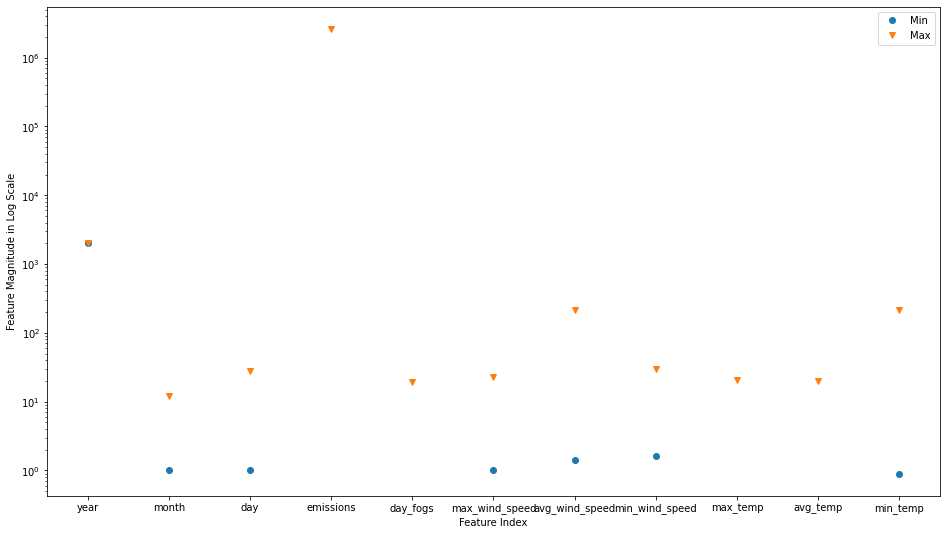

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize= (16,9))
plt.plot(num_cols.min(axis=0), 'o', label='Min')
plt.plot(num_cols.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log') #Logarithmic scale to fit all the values.
plt.legend(loc='upper right')

### **<span style="color:#43A047;">3.7 Capping and Flooring (Outliers Treatment)  </span>**

In [105]:
data1 = data.copy() #Making a chekpoint.

In [106]:
max_col

['emissions', 'day_fogs', 'avg_wind_speed', 'min_temp']

In [107]:
max_col.remove('emissions')

In [108]:
#Otiliers capping according to percentile for each column
percentile = 2
for i in max_col:
    data1[i][(data1[i]>(np.nanpercentile(data1.loc[:,i],[100-percentile])[0]))]= (np.nanpercentile(data1.loc[:,i],[100-percentile])[0])
for i in min_col:
    data1[i][(data1[i]<(np.nanpercentile(data1.loc[:,i],[percentile])[0]))]= (np.nanpercentile(data1.loc[:,i],[percentile])[0])

In [109]:
data1.describe() #Cheking results

,year,month,day,emissions,day_fogs,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp
count,56646.000000,56646.000000,56646.000000,5.664600e+04,56646.000000,56641.000000,56646.000000,56646.000000,56646.000000,56646.000000,56646.000000
mean,2012.934717,6.500212,14.482541,5.839256e+02,2.214896,15.516128,18.007332,22.507376,9.461657,10.458664,13.433311
std,3.855421,3.439418,8.062658,2.431450e+04,3.691141,3.054983,2.308368,3.044621,5.214642,5.076520,5.205377
min,2007.000000,1.000000,1.000000,0.000000e+00,0.000000,9.384235,14.140999,16.424467,-3.141464,0.422014,0.895952
25%,2010.000000,4.000000,8.000000,0.000000e+00,0.000000,13.315221,15.999739,20.312214,5.896431,7.191153,9.904094
50%,2013.000000,7.000000,14.000000,0.000000e+00,1.000000,15.494260,18.012590,22.513323,9.696771,10.688371,13.679253
75%,2016.000000,9.000000,22.000000,0.000000e+00,2.000000,17.718195,20.009832,24.689080,13.289559,14.210298,17.310861
max,2020.000000,12.000000,28.000000,2.620000e+06,17.000000,22.991382,21.843796,29.933603,20.938266,19.998710,22.995017


### **<span style="color:#43A047;">3.8 Features visualization and comparation </span>**

#### **<span style="color:#4CAF50;">3.8.1 Unvariate Analysis (EDA: Exploratory Data Analysis) </span>**

In [110]:
def pie_count_chart (x, data, qty=10):
    """Creates a pie chart of the specific categorical feature chosen."""
    import plotly.subplots as sp
    import plotly.express as px
    df1 = pd.DataFrame()
    df1 = data[[x]].groupby([x])[x] \
                         .count() \
                         .reset_index(name='count') \
                         .sort_values(['count'], ascending=False) \
                         .iloc[:qty]
    
    figure1 = px.pie(df1, values = "count", color_discrete_sequence=px.colors.sequential.RdBu,
                 names = "count", width = 400, height = 400, hover_data=[x], 
                  labels={x:'Date'}, title='Pie Chart of the highest %d (%s)' %(qty, x))
    figure1.show()

In [111]:
interact(pie_count_chart,
         x = cat_cols.columns,
         data = fixed(cat_cols),
         qty= IntSlider(min=0, max=100, step=1))

interactive(children=(Dropdown(description='x', options=('continent', 'country', 'city', 'city_id', 'sector', …

<function __main__.pie_count_chart(x, data, qty=10)>

In [154]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [162]:
len(num_cols.columns.values.tolist())

11

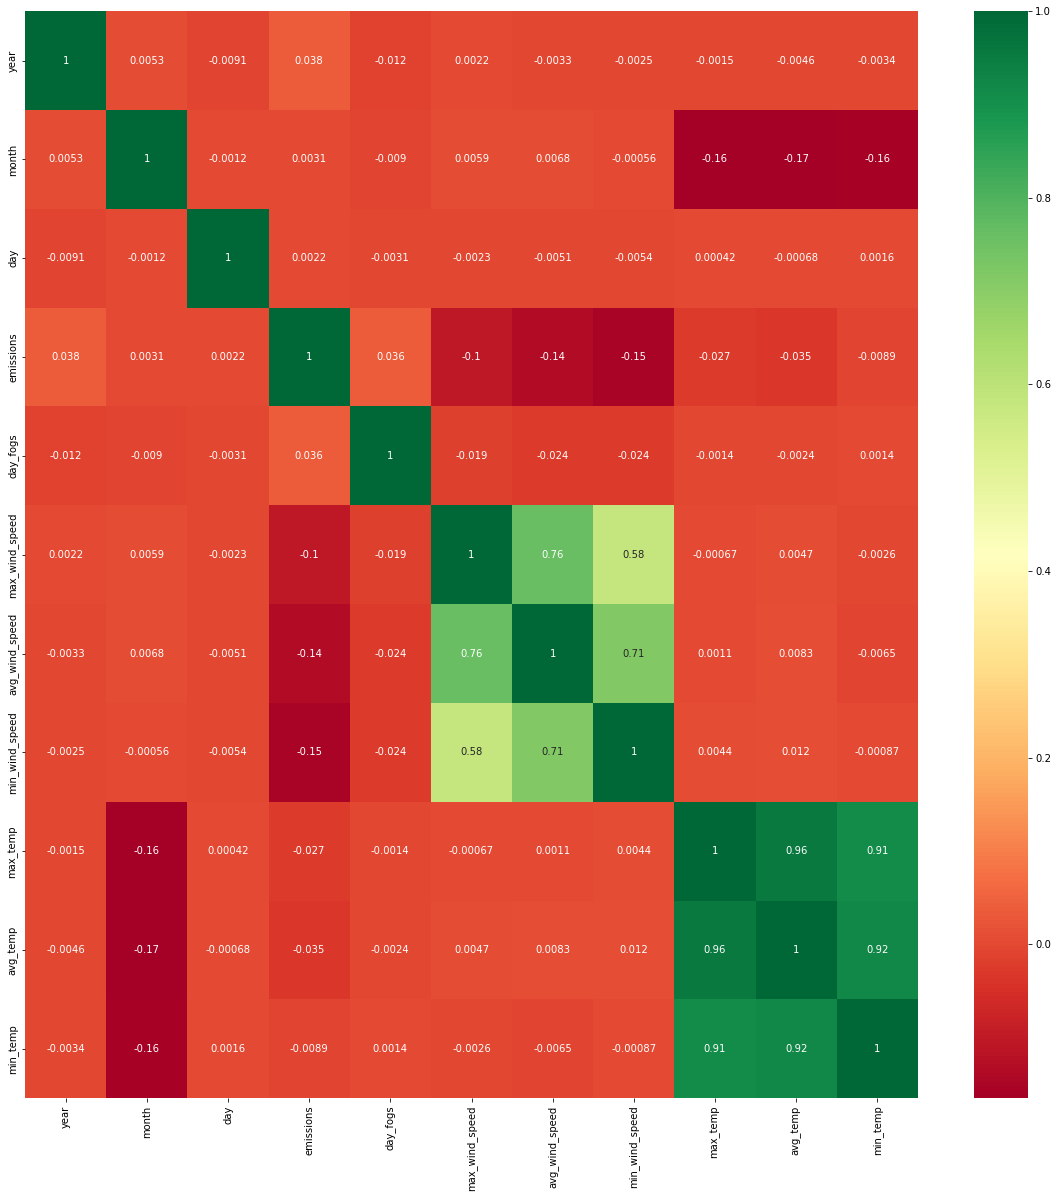

In [167]:
X = data.iloc[:,0:23]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [195]:
len(data1.columns.values.tolist())

16

In [197]:
X = data1.iloc[:,0:15]  #independent columns
y = data1.iloc[:,-1] 

In [188]:
data.drop(['continent'], inplace=True, axis=1)

In [200]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importanes = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, data1.columns[0:len(data1.columns)-1])
feat_importances.plot(kind = 'barh', color= 'teal')
plt.show()

ValueError: could not convert string to float: 'Germany'

In [199]:
from sklearn.feature_selection import chi2

X_cat = cat_cols.astype(int)

chi2_features = SelectKBest(chi2, k=3)
X_kbest_features = chi2_features.fit_transform(X_cat, Y)

print("Original feature number: ", X_cat.shape[1])
print("Reduced feature number: ", X_kbest_features.shape[1])

ValueError: invalid literal for int() with base 10: 'EUROPE'

In [ ]:
import numpy as np
from scipy.sparse import *
from skfeature.utility.construct_W import construct_W


def fisher_score(X, y):
    """
    This function implements the fisher score feature selection, steps are as follows:
    1. Construct the affinity matrix W in fisher score way
    2. For the r-th feature, we define fr = X(:,r), D = diag(W*ones), ones = [1,...,1]', L = D - W
    3. Let fr_hat = fr - (fr'*D*ones)*ones/(ones'*D*ones)
    4. Fisher score for the r-th feature is score = (fr_hat'*D*fr_hat)/(fr_hat'*L*fr_hat)-1
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    Output
    ------
    score: {numpy array}, shape (n_features,)
        fisher score for each feature
    Reference
    ---------
    He, Xiaofei et al. "Laplacian Score for Feature Selection." NIPS 2005.
    Duda, Richard et al. "Pattern classification." John Wiley & Sons, 2012.
    """

    # Construct weight matrix W in a fisherScore way
    kwargs = {"neighbor_mode": "supervised", "fisher_score": True, 'y': y}
    W = construct_W(X, **kwargs)

    # build the diagonal D matrix from affinity matrix W
    D = np.array(W.sum(axis=1))
    L = W
    tmp = np.dot(np.transpose(D), X)
    D = diags(np.transpose(D), [0])
    Xt = np.transpose(X)
    t1 = np.transpose(np.dot(Xt, D.todense()))
    t2 = np.transpose(np.dot(Xt, L.todense()))
    # compute the numerator of Lr
    D_prime = np.sum(np.multiply(t1, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # compute the denominator of Lr
    L_prime = np.sum(np.multiply(t2, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # avoid the denominator of Lr to be 0
    D_prime[D_prime < 1e-12] = 10000
    lap_score = 1 - np.array(np.multiply(L_prime, 1/D_prime))[0, :]

    # compute fisher score from laplacian score, where fisher_score = 1/lap_score - 1
    score = 1.0/lap_score - 1
    return np.transpose(score)


def feature_ranking(score):
    """
    Rank features in descending order according to fisher score, the larger the fisher score, the more important the
    feature is
    """
    idx = np.argsort(score, 0)
    return idx[::-1]

#### **<span style="color:#4CAF50;">3.8.2 Bivariate Analysis (EDA: Exploratory Data Analysis) </span>**

In [112]:
def plotting_bar (x,y,bar,data,qty):
    import plotly.subplots as sp
    import plotly.express as px
    if x != y:
        df1 = data[[x, y, bar]].groupby([x, bar])[y] \
                                 .count() \
                                 .reset_index(name=y) \
                                 .sort_values([y], ascending=False) \
                                 .head(qty)
        figure1  = px.bar(df1, x=x, y=y, color=str(bar), barmode='group', height=400, width=700 ,
                          title='Bar graph (%s) vs (%s) of the greaters %d ' %(x, y, qty))
        figure1.show()
    else:
        print("Feature selection problem.")

In [113]:
interact(plotting_bar,
         x= list(data1.columns[:-1]), #Eje x a contrastar
         y= list(data1.columns[:-1]), #Eje y a contrastar (cuantificar)
         bar = fixed(data1.columns[-1]), #Barras a graficar
         data = fixed(data1),
         qty= IntSlider(min=0, max=100, step=1))

interactive(children=(Dropdown(description='x', options=('year', 'month', 'day', 'continent', 'country', 'city…

<function __main__.plotting_bar(x, y, bar, data, qty)>

In [121]:
type(features)

list

In [115]:
 # importing the required function
from scipy.stats import chi2_contingency

In [132]:
features_reverse = features[::-1]

In [134]:
features

['pollutant',
 'CITY_ID',
 'DAYS FOG',
 'avg_temp',
 'min_temp',
 'max_temp',
 'avg_wind_speed',
 'min_wind_speed',
 'max_wind_speed',
 'YEAR',
 'MONTH',
 'DAY',
 'emissions',
 'eprtrSectorName',
 'EPRTRSectorCode',
 'CITY',
 'CONTINENT',
 'COUNTRY',
 'FacilityInspireID',
 'FACILITY NAME']

In [133]:
features_reverse

['FACILITY NAME',
 'FacilityInspireID',
 'COUNTRY',
 'CONTINENT',
 'CITY',
 'EPRTRSectorCode',
 'eprtrSectorName',
 'emissions',
 'DAY',
 'MONTH',
 'YEAR',
 'max_wind_speed',
 'min_wind_speed',
 'avg_wind_speed',
 'max_temp',
 'min_temp',
 'avg_temp',
 'DAYS FOG',
 'CITY_ID',
 'pollutant']

In [142]:
cat_cols.columns.values[::-1]

array(['pollutant', 'reporter_name', 'target_release', 'facility_name',
       'sector_code', 'facility_id', 'facility_code', 'activity',
       'sector', 'city_id', 'city', 'country', 'continent'], dtype=object)

In [153]:
for i in range (len(cat_cols.columns.values.tolist())):
    x=cat_cols.columns.values.tolist()[i]
    for j in range (i+1,len(cat_cols.columns.values.tolist()),1):
        y = cat_cols.columns.values.tolist()[j]
        CrosstabResult=pd.crosstab(index=data[x],columns=data[y])
        ChiSqResult = chi2_contingency(CrosstabResult)
        # P-Value is the Probability of H0 being True
        # If P-Value > 0.05 then only we Accept the assumption(H0)
        print('The P-Value of the ChiSq Test between %s & %s is %.3f' %(x,y,ChiSqResult[1]))

The P-Value of the ChiSq Test between continent & country is 1.000
The P-Value of the ChiSq Test between continent & city is 1.000
The P-Value of the ChiSq Test between continent & city_id is 1.000
The P-Value of the ChiSq Test between continent & sector is 1.000
The P-Value of the ChiSq Test between continent & activity is 1.000
The P-Value of the ChiSq Test between continent & facility_code is 1.000
The P-Value of the ChiSq Test between continent & facility_id is 1.000
The P-Value of the ChiSq Test between continent & sector_code is 1.000
The P-Value of the ChiSq Test between continent & facility_name is 1.000
The P-Value of the ChiSq Test between continent & target_release is 1.000
The P-Value of the ChiSq Test between continent & reporter_name is 1.000
The P-Value of the ChiSq Test between continent & pollutant is 1.000
The P-Value of the ChiSq Test between country & city is 0.000
The P-Value of the ChiSq Test between country & city_id is 0.000
The P-Value of the ChiSq Test between

In [116]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


In [609]:
data1[['facility_code','activity']].corr()

""


<AxesSubplot:xlabel='facility_code', ylabel='activity'>

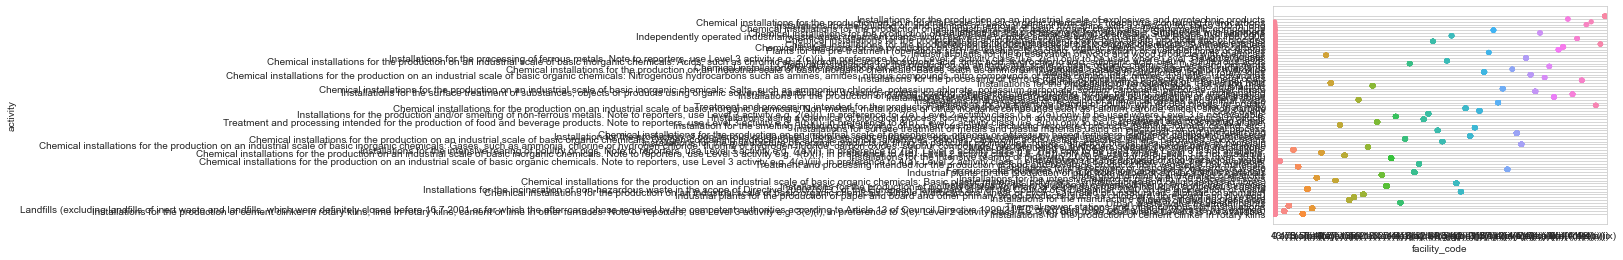

In [610]:
sns.stripplot(x=data1['facility_code'], y=data1['activity'])


### **<span style="color:#43A047;">3.9 Deleting unnecessary features:</span>** 

In this section, based on the univariate and bivariate analysis and the graphs obtained with them, we can say that the variables:

* **contintent**: Since it is a single continent.
* **city & city_ID**: Since both reflects exact the same information, and the distribucion is quite iqual in both cases.
* **facility_ID**: Since this variable is directly correlated with the facility code and we have few numbers of it.
* **sector_code**: Since this variable is directly correlated with the sector.
* **facility_name**: Since it is uniformly distributed and there are no signs that any variable stands out over another.
* **target_release**: Since 99.9% is AIR, and this does not provide useful information.
* **reporter_name**: Since it is uniformly distributed and there are no signs that any variable stands out over another.

do not contribute relevant information to the result.

In [193]:
data1.drop(['continent','city', 'city_id', 'facility_id', 'sector_code', 'facility_name', 'target_release','reporter_name'], inplace=True, axis=1)

### **<span style="color:#43A047;">3.10 Creating dummy and encoding if necesary</span>** 

####  **<span style="color:#4CAF50;">3.10.1 Encoding </span>**  
First we will encode according to the pre-written requirements.

In [555]:
len(data1['pollutant'].unique())

3

In [556]:
data1['pollutant'].unique()

array(['Carbon dioxide (CO2)', 'Nitrogen oxides (NOX)', 'Methane (CH4)'],
      dtype=object)

In [557]:
data1['pollutant'].replace({'Carbon dioxide (CO2)':0, 'Nitrogen oxides (NOX)':1, 'Methane (CH4)':2}, inplace=True)

In [560]:
cat_cols = data1.select_dtypes(include=['category','object', 'bool_'])
num_cols = data1.select_dtypes(include=['number','int','float'])

####  **<span style="color:#4CAF50;">3.10.2 Dummyzing </span>**  

In [611]:
data1

,year,month,day,continent,country,city,city_id,sector,activity,facility_code,...,emissions,day_fogs,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,reporter_name,pollutant
0,2015,10,20,EUROPE,Germany,Sehnde,7cdb5e74adcb2ffaa21c1b61395a984f,Mineral industry,Installations for the production of cement cli...,0,...,0.000,2.000,15.119,14.313,21.419,2.865,4.924,9.688,Mr. Jacob Ortega,Carbon dioxide (CO2)
1,2018,9,21,EUROPE,Italy,TAVERNOLA BERGAMASCA,cd1dbabbdba230b828c657a9b19a8963,Mineral industry,Installations for the production of cement cli...,0,...,0.000,1.000,19.662,19.368,21.756,5.463,7.864,12.024,Ashlee Serrano,Nitrogen oxides (NOX)
2,2019,2,4,EUROPE,Spain,PUERTO DEL ROSARIO,5011e3fa1436d15b34f1287f312fbada,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,0,...,0.000,2.000,12.729,14.702,17.104,1.511,4.233,8.632,Vincent Kemp,Methane (CH4)
3,2012,8,6,EUROPE,Czechia,Kadaň,37a6d7a71c4f7c2469e4f01b70dd90c2,Energy sector,Thermal power stations and other combustion in...,0,...,0.000,0.000,11.856,16.123,17.537,10.970,10.298,15.179,Carol Gray,Nitrogen oxides (NOX)
4,2018,12,22,EUROPE,Finland,Tampere,471fe554e1c62d1b01cc8e4e5076c61a,Waste and wastewater management,Urban waste-water treatment plants,0,...,0.000,2.000,17.112,20.202,21.536,11.772,11.344,16.039,Blake Ford,Methane (CH4)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56641,2019,10,11,EUROPE,United Kingdom,East Barns. Dunbar. East Lothian,6935acf68ac33c9c85ff634275880d97,Waste and wastewater management,,,...,323000.000,1.000,9.384,14.141,16.424,6.822,8.771,1.372,,Nitrogen oxides (NOX)
56642,2019,5,19,EUROPE,United Kingdom,Shetland,223137a83f11fbc93f2af549579ee6ac,Energy sector,,,...,2.081,17.000,9.384,14.141,16.424,1.182,1.452,1.922,,Carbon dioxide (CO2)
56643,2019,4,16,EUROPE,United Kingdom,Shetland,223137a83f11fbc93f2af549579ee6ac,Energy sector,,,...,101000.000,6.000,9.384,14.141,16.424,1.562,1.812,2.122,,Methane (CH4)
56644,2019,2,3,EUROPE,United Kingdom,Shetland,223137a83f11fbc93f2af549579ee6ac,Energy sector,,,...,148000.000,17.000,9.384,14.141,16.424,9.662,1.116,1.262,,Nitrogen oxides (NOX)


In [607]:
for i in cat_cols.columns.values.tolist():
    print("\n")
    print(i)
    print("\n")
    print(data1[i].unique())
    print(len(data1[i].unique()))



country


['Germany' 'Italy' 'Spain' 'Czechia' 'Finland' 'Switzerland' 'France'
 'Poland' 'United Kingdom' 'Sweden' 'Romania' 'Netherlands' 'Austria'
 'Ireland' 'Hungary' 'Portugal' 'Luxembourg' 'Cyprus' 'Estonia' 'Belgium'
 'Bulgaria' 'Lithuania' 'Greece' 'Denmark' 'Iceland' 'Slovenia' 'Norway'
 'Croatia' 'Malta' 'Serbia' 'Slovakia' 'Latvia']
32


sector


['Mineral industry' 'Waste and wastewater management' 'Energy sector'
 'Paper and wood production and processing' 'Chemical industry'
 'Production and processing of metals'
 'Intensive livestock production and aquaculture'
 'Animal and vegetable products from the food and beverage sector'
 'Other activities']
9


activity


['Installations for the production of cement clinker in rotary kilns'
 'Installations for the production of cement clinker in rotary kilns, lime in rotary kilns, cement or lime in other furnaces. Note to reporters, use Level 3 activity e.g. 3(c)(i), in preference to 3(c). Level 2 activity class (i.e. 3(c)) only

In [ ]:
data1['pollutant'].unique()

In [ ]:
categories = ["xxx1", "xxx2", "xxx3", "xxx4", "xxx5", "xxx5", "xxx6"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_list)
    data1 = data1.join(cat_dummies[:-1]) ## WIP THERE IS NOT NECESARY TO ADD ALL THE DUMMY, CAUSE COULD IT BE REDUNDANT
    del data1[category] #Deleting original dummie variable

In [ ]:
data1.head()#quick review if all goes well

---------------------------------------------------------------------

### ✅  4) Preparing data for training and testing 🏃

### **<span style="color:#43A047;">4.1 Variables Stadnarization  </span>**

In [ ]:
X = data1.loc[:, data1.columns != 'TARGET'] # Assing X (feature columns)
y = data1['TARGET']# Assing y (target column)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **<span style="color:#43A047;">4.1 Variables Stadnarization  </span>**

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train) #Variables standarization
X_train_s = scaler.transform(X_train) #Variables transform

In [ ]:
train, test = train_test_split(df, test_size = 0.2)
print("Longitud de datos de entrenamiento: %f" %(len(train)), "datos de testing: %f" %(len(test)))  

In [ ]:
#Asignación de variables predictoras y target
colnames = df.columns.values.tolist()
predictors=colnames[1:xx]
target=colnames[xx]

---------------------------------------------------------------------

### ✅ 5) Training the model with training data🏋️

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
%%time
def find_best_model_using_gridsearchcv(X,y):
    """Function with three models for classification"""
    
    algos = {
        'Logistic_Regression' : {
        'model': LogisticRegression(),
        'params': {
            'max_iter':[1000, 2000, 5000],
            #'C':[,10,100,1000],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  
            }
        },
        'Linear_Discriminant_Analysis': {
        'model': LinearDiscriminantAnalysis(),
        'params': {
            'solver':['svd', 'lsqr', 'eigen']  
            }
        },      
        'K_Nearest_Neighbors':{
            'model' : KNeighborsClassifier(),
            'params':{
            'n_neighbors': [5,10],
            'metric': ["minkowski", 'euclidean', 'manhattan', 'chebyshev', 'wminkowski', 'seuclidean', 'mahalanobis'],
            'p': [2],
            'n_neighbors': range(100)
            }                                                        
        },
        'Decision_Tree_Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy', 'log_loss'],
            'min_samples_split': [10,100,1000],
            'max_depth' :[3,5,10,20],
            'splitter': ['best','random']
            }
        },
        'Random_Forest_Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_jobs' : [multiprocessing.cpu_count() - 1],            
            'n_estimators': [10,100,200,500],
            'max_depth'   : [None, 3, 10, 20],
            'criterion'   : ['gini', 'entropy']
            }
        },      
        'MLP_Classifier': {
        'model': MLPClassifier(),
        'params': {            
            'max_iter':[1000],
            'alpha':[0.001,0.01,0.1,1],
            }
        },      
        'Support_Vector_Classifier': {
        'model': SVC(),
        'params': {
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'C':[1,100,1000,10000],
            'gamma':[0.0001,0.001,0.01,0.1]
            }
         },       
        #'Gradien_Boosting_Classifier': {
        #'model': GradientBoostingClassifier(),
        #'params':  {
        #    'n_estimators'  : [50, 100, 500, 1000],
        #    'max_features'  : ['auto', 'sqrt', 'log2'],
        #    'max_depth'     : [None, 1, 3, 5, 10, 20],
        #    'subsample'     : [0.5, 1],
        #    'learning_rate' : [0.001, 0.01, 0.1]
        #    }
        #}         
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = True)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        }) 
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
best = find_best_model_using_gridsearchcv(X_train_s,y_train)

---------------------------------------------------------------------

### ✅ 6) Making predictions with test data 🤔¶

In [ ]:
def price_predict(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
    x[loc_index]=1
    return model.predict([x])[0]

---------------------------------------------------------------------

### ✅ 7) Comparing predictions with test data📝

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
#print(classification_report(Y_test, y_pred, target_names=["xxxxx", "xxxxx", "xxxxx"]))

In [ ]:
#print("Homogeneidad: %0.3f" %metrics.homogeneity_score(labels, clust_labels))
#print("Completitud: %0.3f" %metrics.completeness_score(labels, clust_labels))
#print("V-measure: %0.3f" %metrics.v_measure_score(labels, clust_labels))
#print("R2 ajustado: %0.3f" %metrics.adjusted_rand_score(labels, clust_labels))
#print("Información mútua ajustada: %0.3f" %metrics.adjusted_mutual_info_score(labels,clust_labels))

---------------------------------------------------------------------

### ✅ 8) Adjusting the model🔨

---------------------------------------------------------------------

### ✅ 9) Results presentation. 🌟

### **<span style="color:#43A047;">9.1 Graphical representation of results  </span>**

### **<span style="color:#43A047;">9.2 Conclusion  </span>**

### **<span style="color:#43A047;">9.3 Making & saving predictions </span>**

In [ ]:
results = pd.DataFrame(pred, columns=['Results'])  

In [ ]:
results.to_csv("../../Practice/1-Random Forest/results.csv", index=False)

In [ ]:
results